In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data.shape

(42000, 785)

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
data

array([[8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
m, n

(42000, 785)

*Create train, valid sets*

In [18]:
# Transpose to have each samples features in a single column
valid_data = data[:1000].T
valid_data.shape

(785, 1000)

In [15]:
# first row has labels
y_valid = valid_data[0]
X_valid = valid_data[1:]

In [26]:
train_data = data[1000:].T
train_data.shape

(785, 41000)

In [29]:
y_train = train_data[0]
X_train = train_data[1:]
X_train[:,0].shape

(784,)

*Create Network*

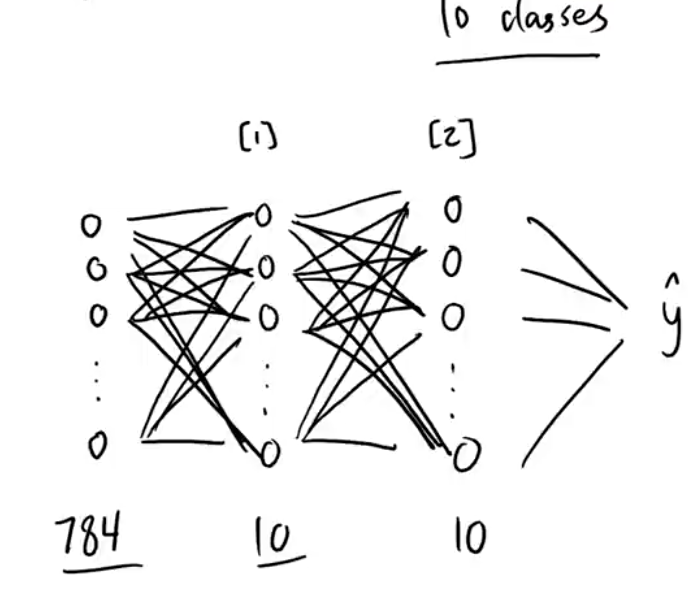

In [35]:
W1 = np.random.rand(10, X_train[:,0].shape[0])
W1.shape[0]

10

In [42]:
def init_params():
    # W shape -> (units, prev layer units)
    # b shape -> (units, 1)
    W1 = np.random.rand(10, X_train[:,0].shape[0]) - .5
    b1 = np.random.rand(10, 1) - .5
    W2 = np.random.rand(10, W1.shape[0]) - .5
    b2 = np.random.rand(10, 1) - .5
    
    return W1, b1, W2, b2

In [51]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1

    # Make each column an example instead of each row
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

In [48]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return A2

In [ ]:
def back_prop(Z1, A1, Z2, A2, W2, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    